In [1]:
import pickle 
import stackstac
from satsearch import Search
import numpy as np
import pandas as pd
import folium
import json
import matplotlib.pyplot as plt
import earthpy.plot as ep
import shapely.geometry
d = {}
for i in range(1, 8):
    with open(f'./results/{i}.pickle', 'rb') as fp:
        temp = pickle.load(fp)
        d = d | temp
print(len(d))

43


In [2]:
def visualize_stations(stations):
    map = folium.Map([40, 46], zoom_start =8)
    for station in stations:
        (name, bbox) = station
        folium.GeoJson(
        shapely.geometry.box(*bbox),
        style_function=lambda x: dict(fill=True, weight=2, opacity=0.8, color="blue"),
        name=name,
        ).add_to(map)
    folium.LayerControl().add_to(map)
    return map
def get_bbox(geometry):
    x_coordinates, y_coordinates = zip(*geometry[0])
    return [min(x_coordinates), min(y_coordinates), max(x_coordinates), max(y_coordinates)]

def convert_bounds(bbox):
    x1, y1, x2, y2 = bbox
    return ((y1, x1), (y2, x2))
def generate_bbox_near_station(lat, long, delta = 1e-2):
    return [long - delta, lat - delta, long + delta, lat + delta]

In [5]:
stations = pd.read_csv('stations.csv')
stations

,LATITUDE,LONGITUDE,METEOROLOG_Arm
0,40.95028,43.78361,Ամասիա
1,39.83056,44.99194,Անանուն լ/ցք
2,41.03250,43.87000,Աշոցք
3,40.29444,44.34278,Աշտարակ
4,40.59444,44.36389,Ապարան
5,40.47222,44.18111,Արագած բ/լ
6,39.83139,44.70833,Արարատ
7,39.72722,45.18833,Արենի
8,40.62333,43.95500,Արթիկ
9,40.13722,44.04750,Արմավիր


In [6]:
stations_data = [[name, generate_bbox_near_station(lat, long)] for [lat, long, name] in stations.values]
map = visualize_stations(stations_data)
map

In [8]:
def generate_plot_data(index_res):
    return [date[:2] for date in index_res][::-1], [index_res[date] for date in index_res][::-1]

def plot_indeces(ndvi, ndwi, nmdi, vci, station_name):
    fig, axis = plt.subplots(2, 2)
    x_ndvi, y_ndvi = generate_plot_data(ndvi)
    axis[0, 0].plot(x_ndvi, y_ndvi, marker='o')
    axis[0, 0].set_title("NDVI")
    # axis[0, 0].set_ylim([0.2, 0./])
    
    x_ndwi, y_ndwi = generate_plot_data(ndwi)
    axis[0, 1].plot(x_ndwi, y_ndwi, marker='o')
    axis[0, 1].set_title("NDWI")
    # axis[0, 1].set_ylim([-1, 1])

    x_nmdi, y_nmdi = generate_plot_data(nmdi)
    axis[1, 0].plot(x_nmdi, y_nmdi, marker='o')
    axis[1, 0].set_title("NMDI")
    # axis[1, 0].set_ylim([-1, 1])

    x_vci, y_vci = generate_plot_data(vci)
    axis[1, 1].plot(x_vci, y_vci, marker='o')
    axis[1, 1].set_title("VCI")
    # axis[1, 1].set_ylim([0, 100])

    fig.suptitle(station_name, fontsize=16)
    fig.tight_layout()
    plt.show();

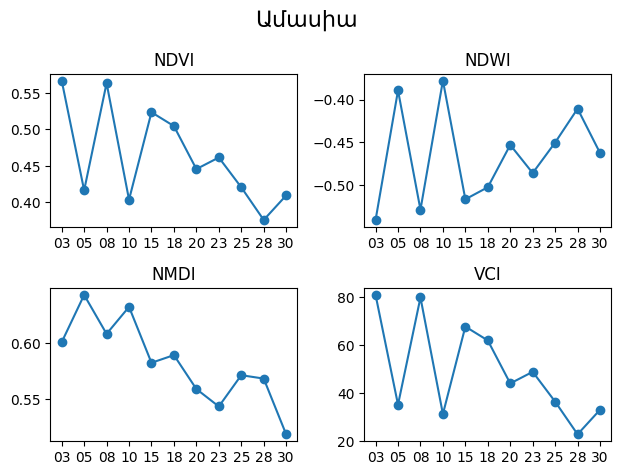

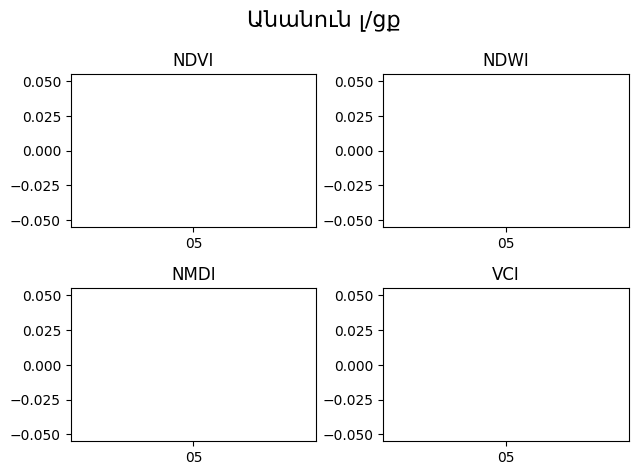

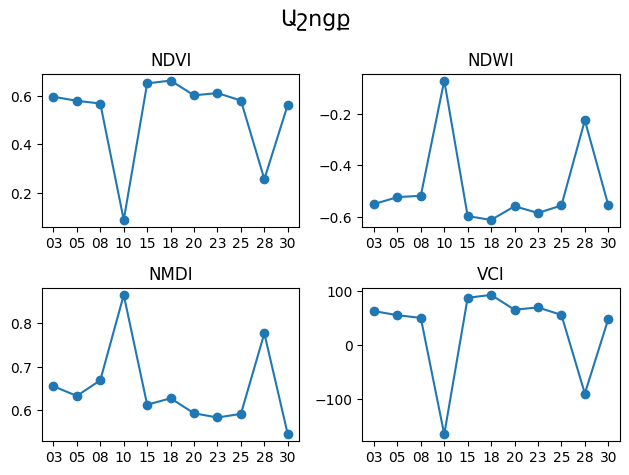

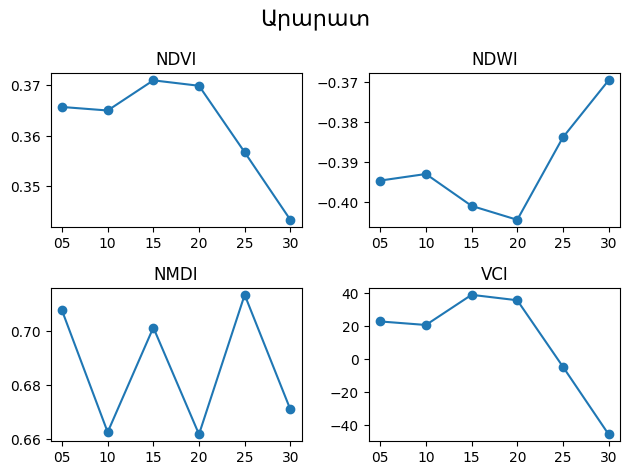

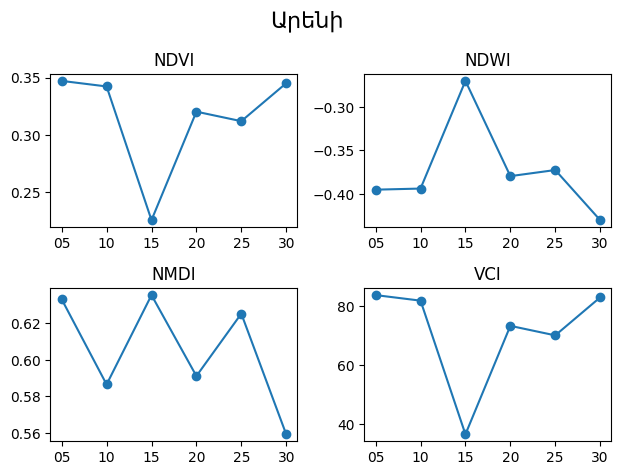

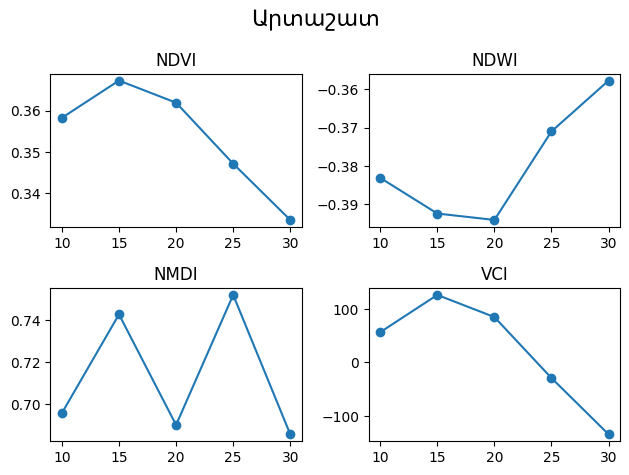

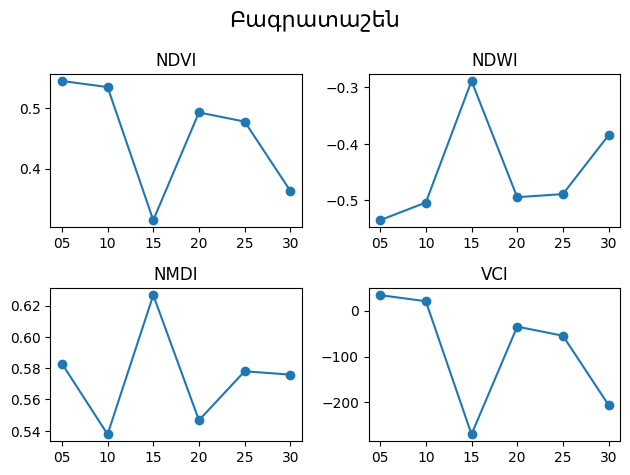

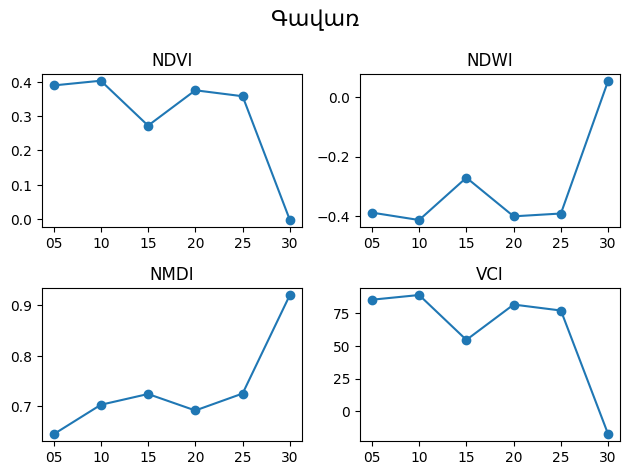

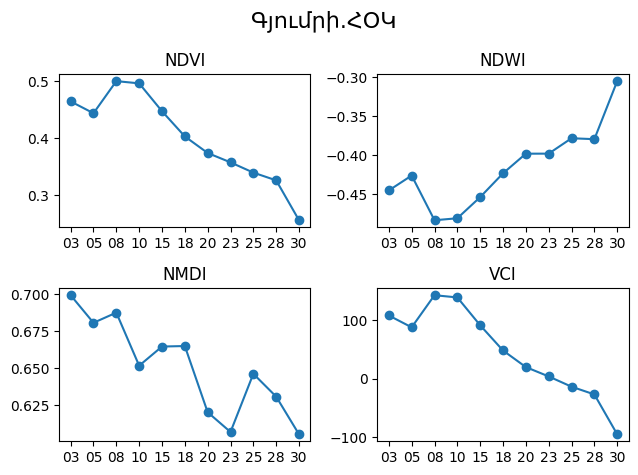

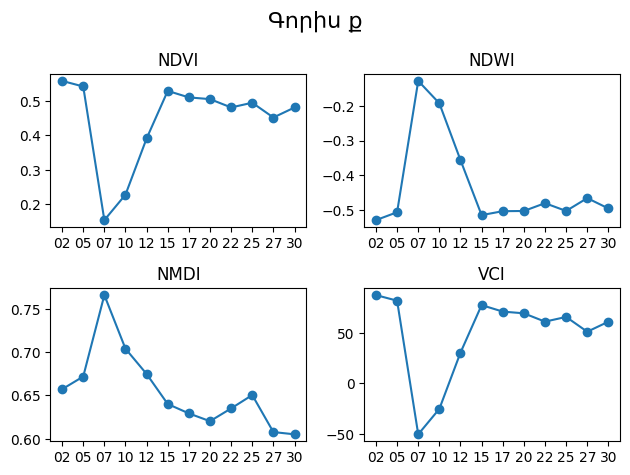

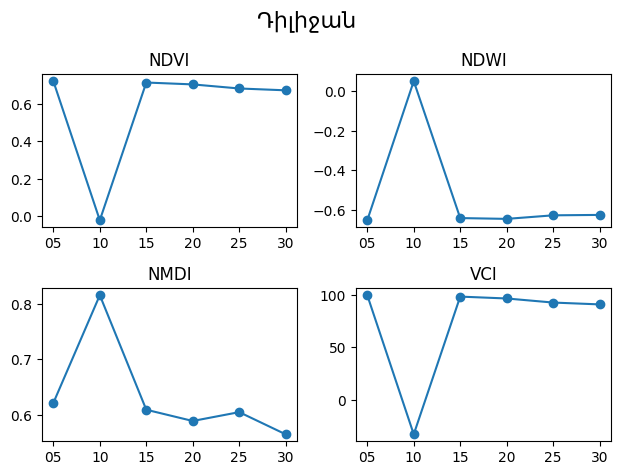

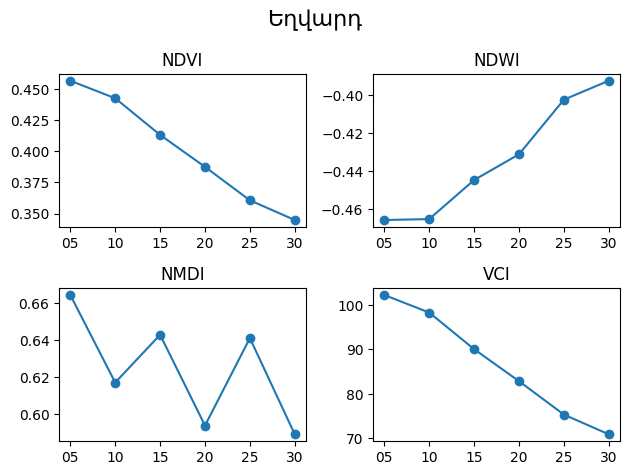

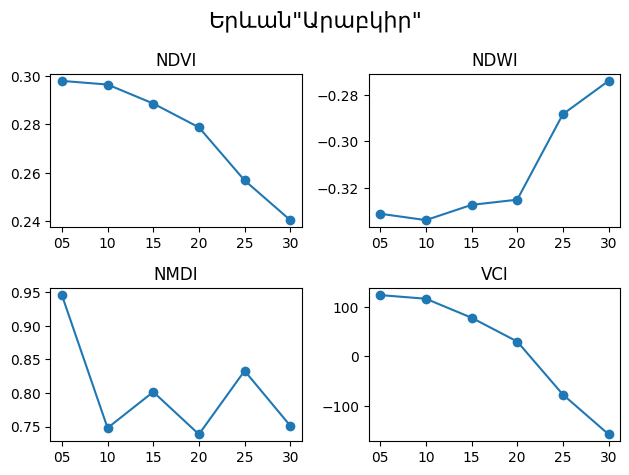

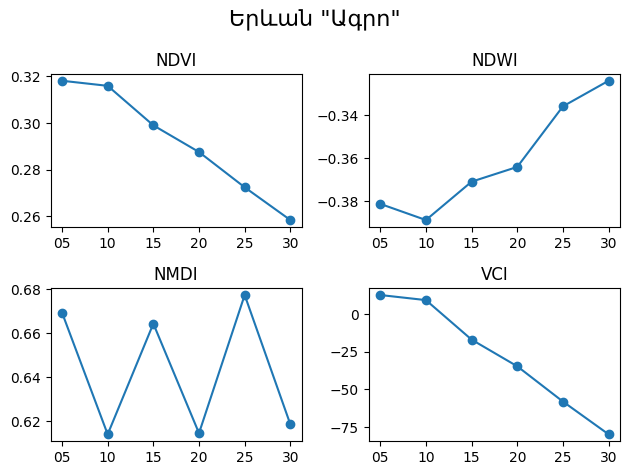

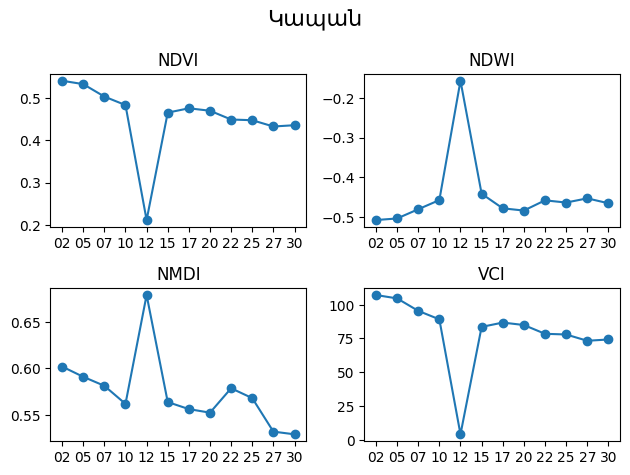

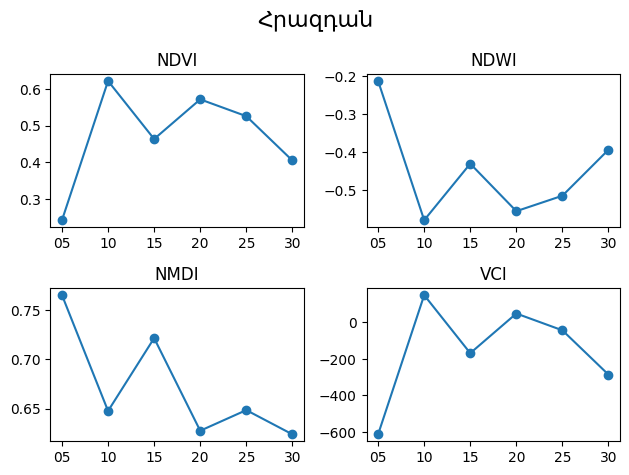

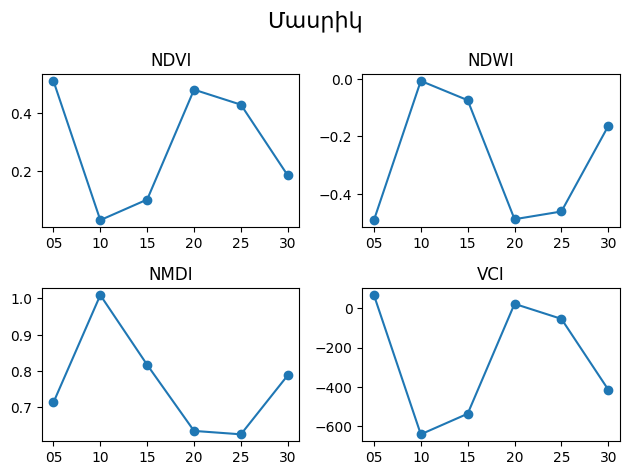

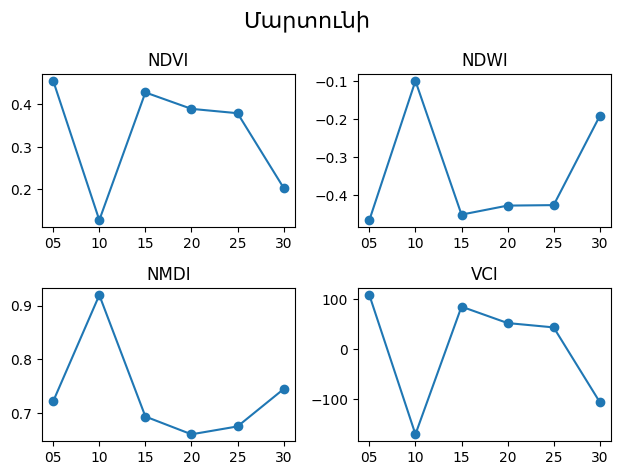

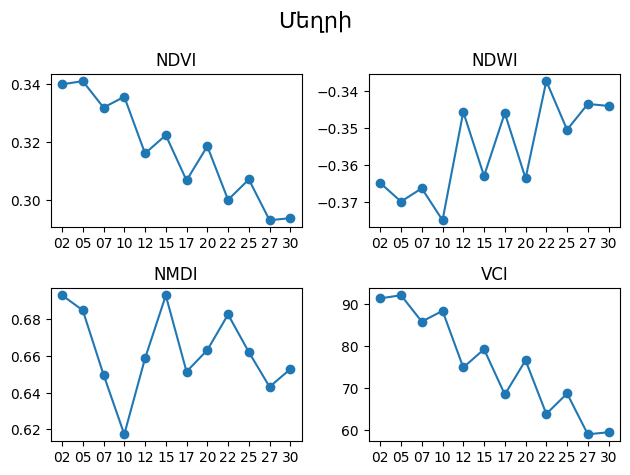

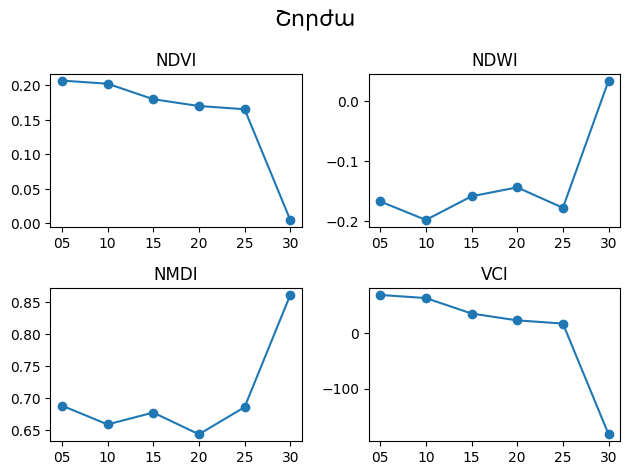

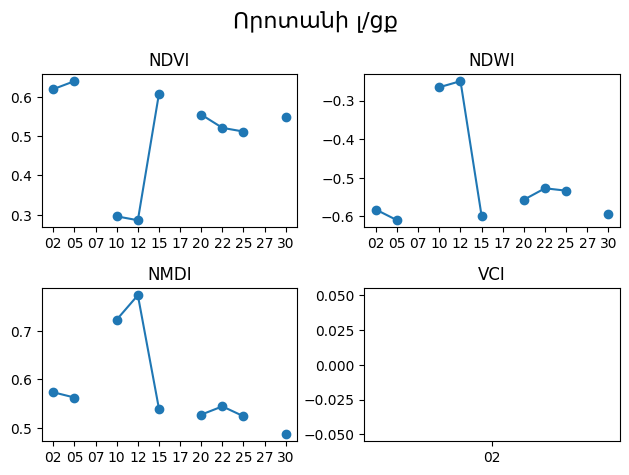

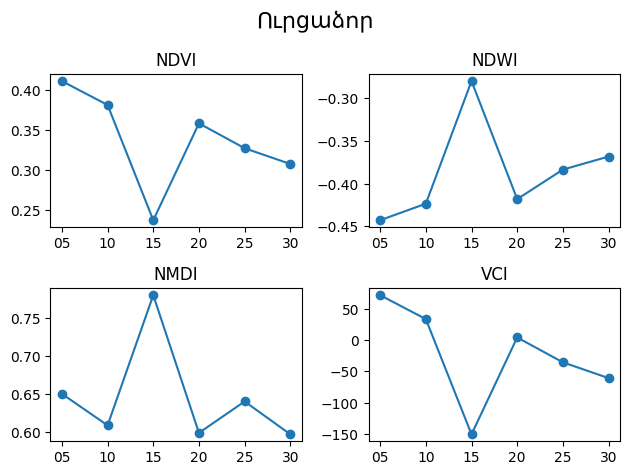

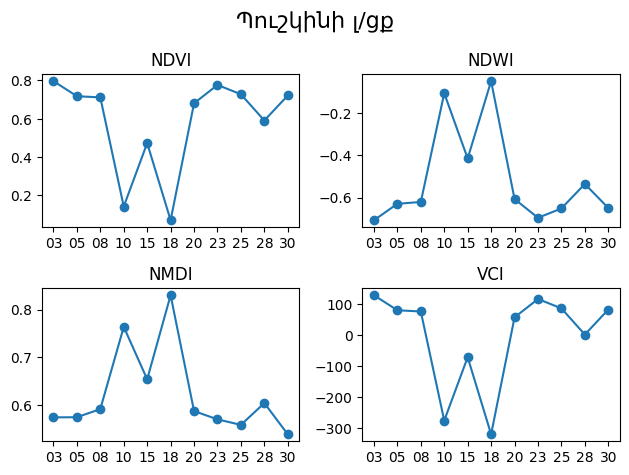

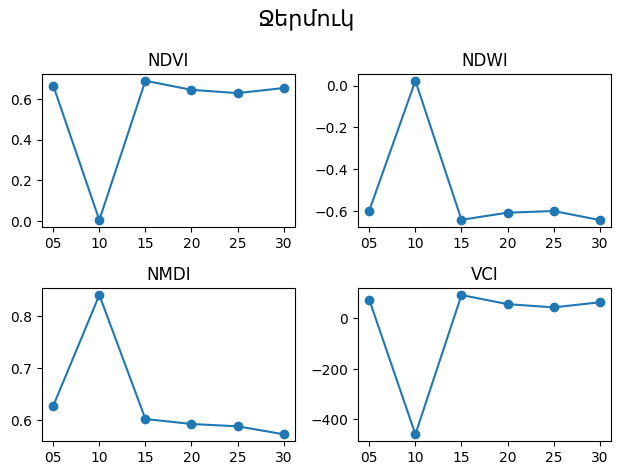

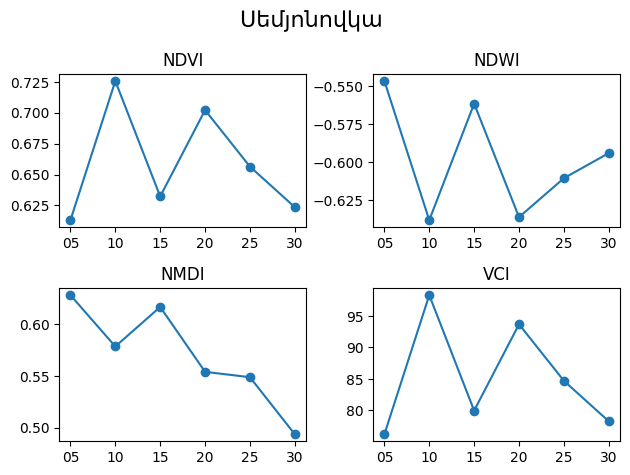

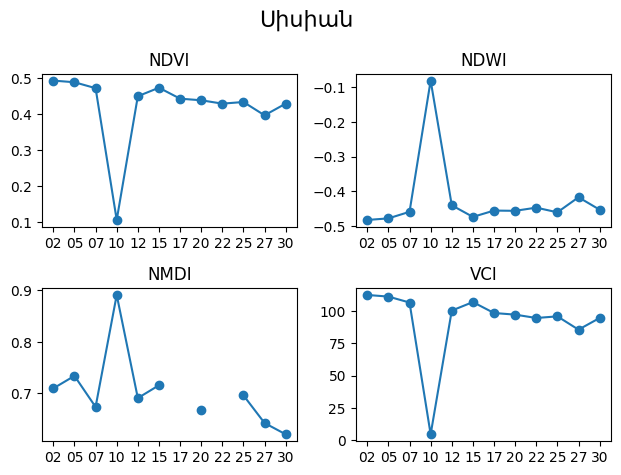

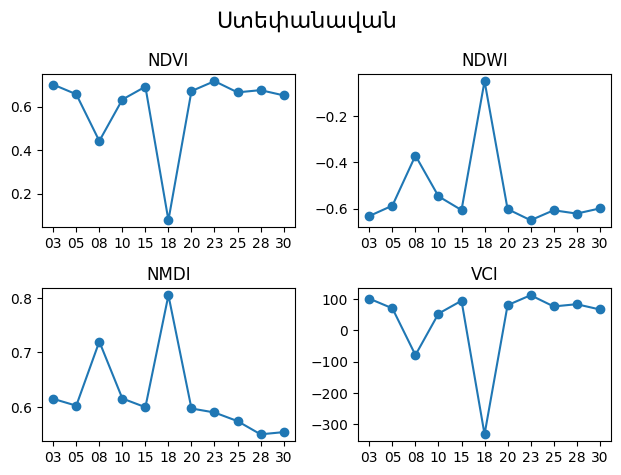

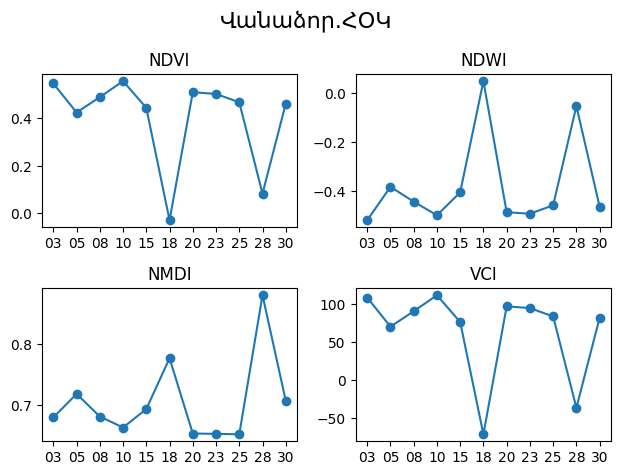

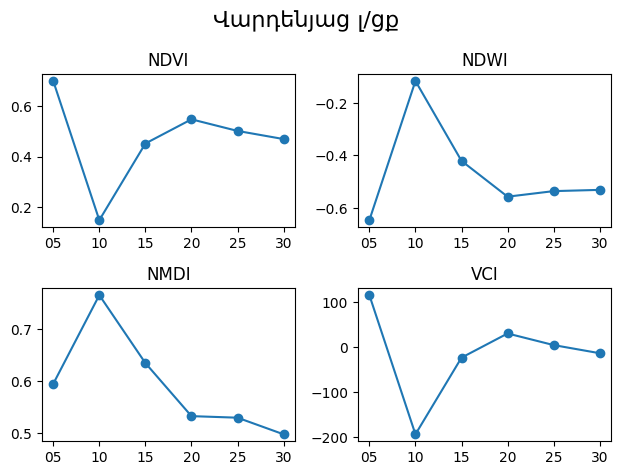

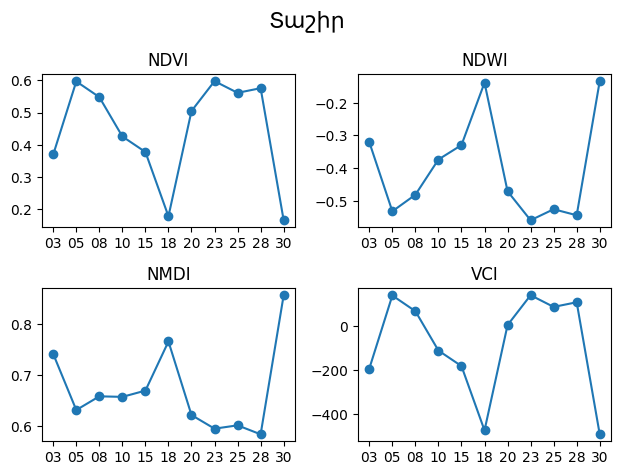

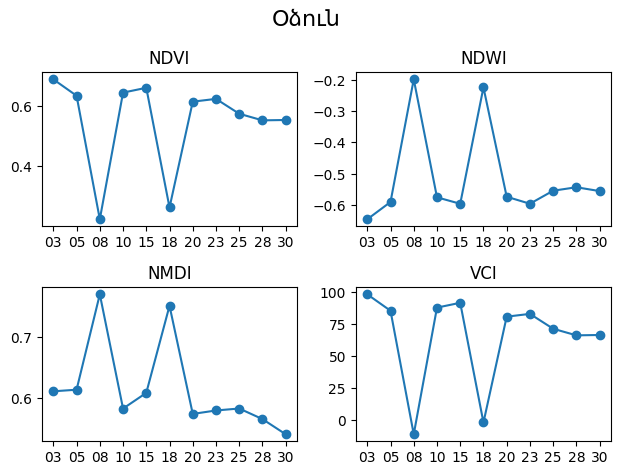

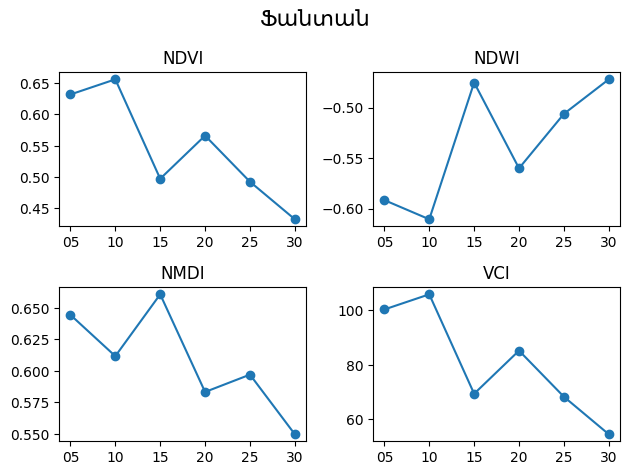

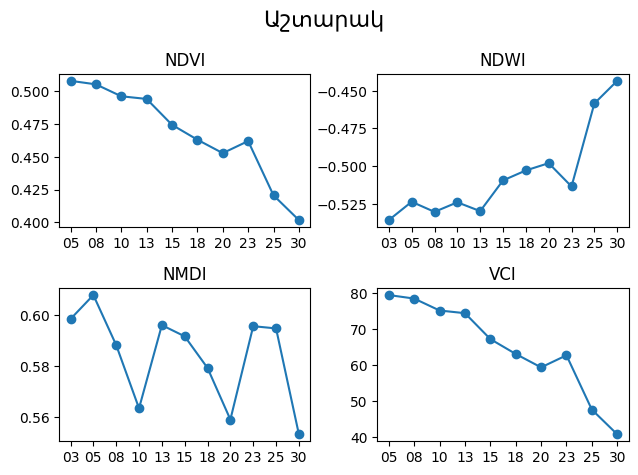

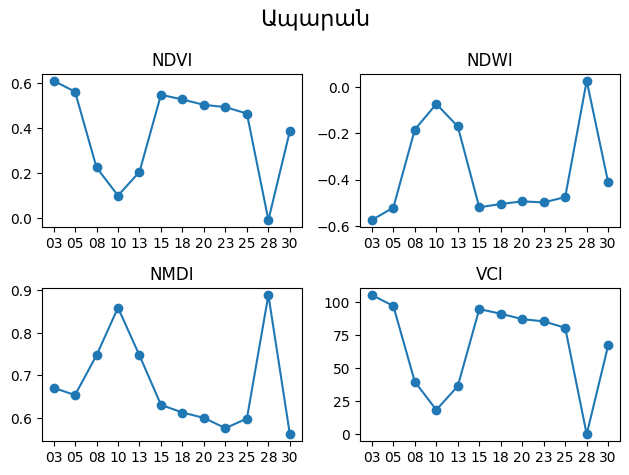

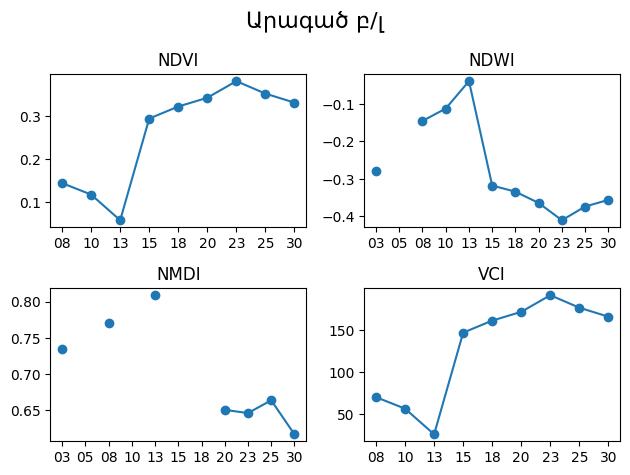

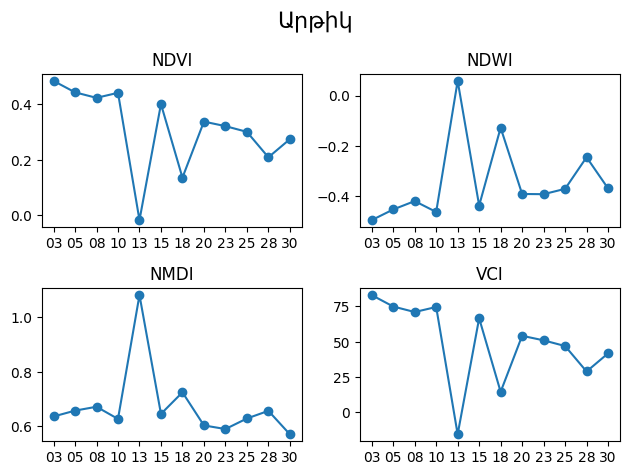

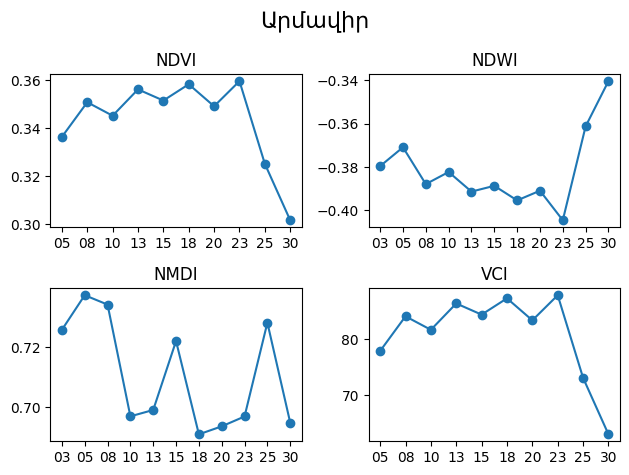

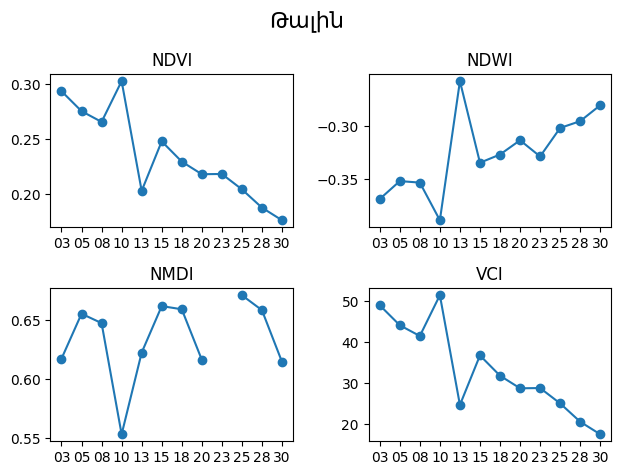

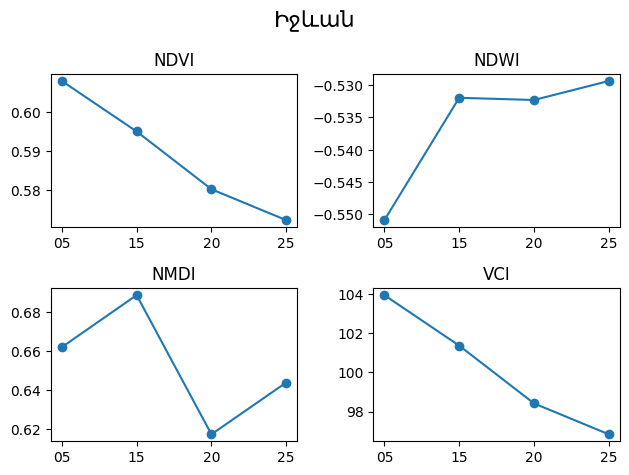

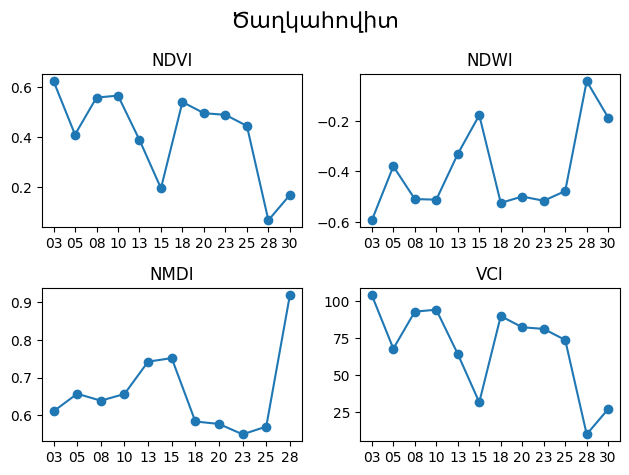

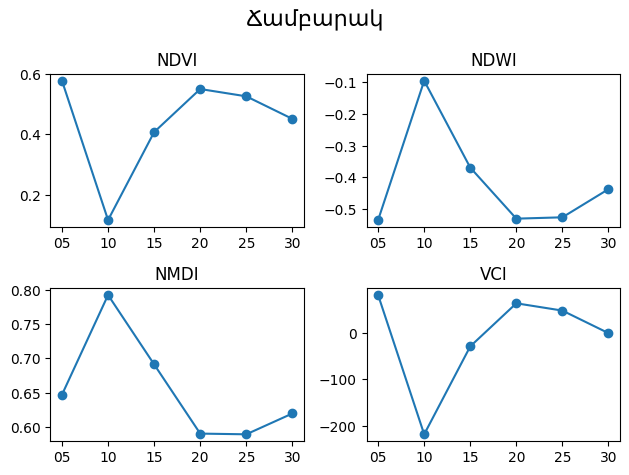

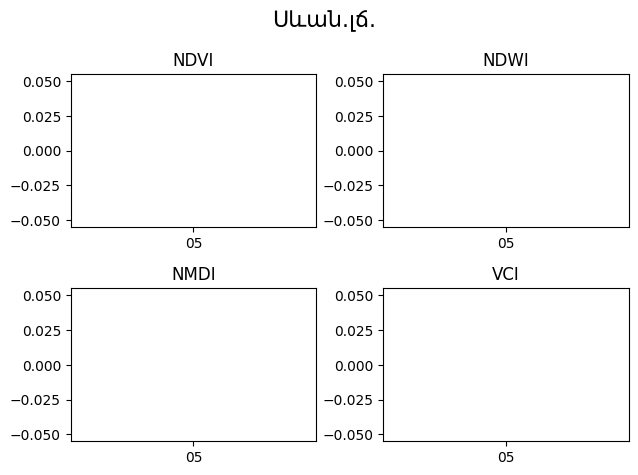

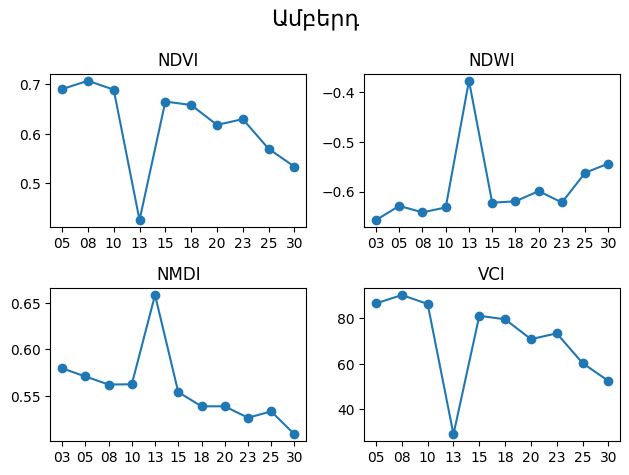

In [9]:
for station in d:
    plot_indeces(d[station].get('ndvi'), d[station].get('ndwi'), d[station].get('nmdi'), d[station].get('vci'), station)